<a href="https://colab.research.google.com/github/gpslakshan/AttritionGuard/blob/main/AttritionGuard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# We want our plots to be appeared inside the notebook
%matplotlib inline

from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
pd.set_option('display.max_columns', None)

# Loading the Dataset

In [ ]:
df = pd.read_csv("attrition.csv")

# Rows, Columns
df.shape

(1470, 35)

# Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [ ]:
# Let's find out how many of each class there are
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

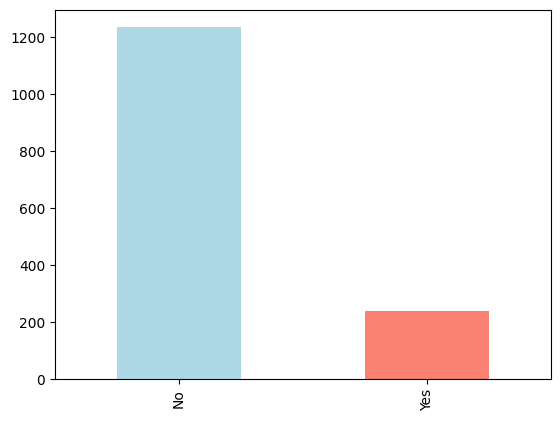

In [ ]:
df["Attrition"].value_counts().plot(kind='bar', color=["lightblue", "salmon"]);

highly imbalanced dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Are there any missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Attrition Frequency according to Gender

In [ ]:
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [ ]:
# Compare Gender column with Attrition
pd.crosstab(df["Attrition"], df["Gender"])

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


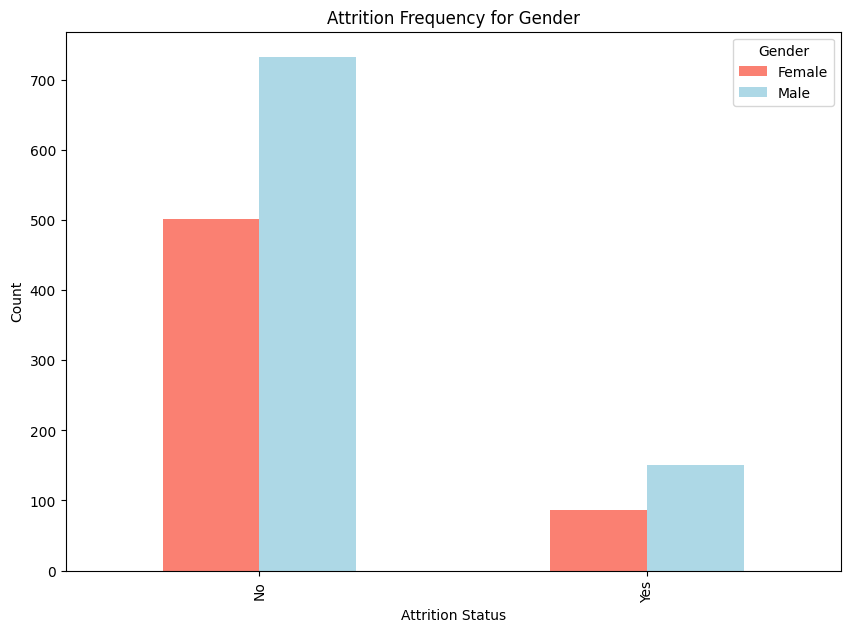

In [ ]:
pd.crosstab(df["Attrition"], df["Gender"]).plot(
    kind="bar",
    color=["salmon", "lightblue"],
    figsize=(10,7)
)
plt.title("Attrition Frequency for Gender")
plt.xlabel("Attrition Status")
plt.ylabel("Count");

## YearsAtCompany vs MonthlyIncome for Attrition

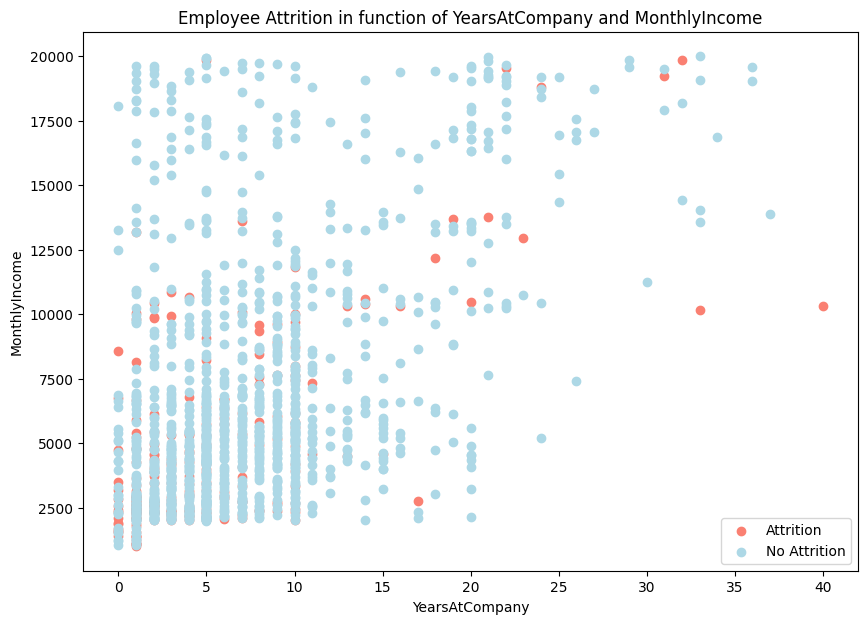

In [ ]:
# Create another figure
plt.figure(figsize=(10,7))

# Scatter with positive (["Attrition"] == "Yes") examples
plt.scatter(
    df.YearsAtCompany[df["Attrition"] == "Yes"],
    df.MonthlyIncome[df["Attrition"] == "Yes"],
    c="salmon"
)

# Scatter with negative (["Attrition"] == "No") examples
plt.scatter(
    df.YearsAtCompany[df["Attrition"] == "No"],
    df.MonthlyIncome[df["Attrition"] == "No"],
    c="lightblue"
)

# Add some helpful info
plt.title("Employee Attrition in function of YearsAtCompany and MonthlyIncome")
plt.xlabel("YearsAtCompany")
plt.ylabel("MonthlyIncome")
plt.legend(["Attrition", "No Attrition"]);

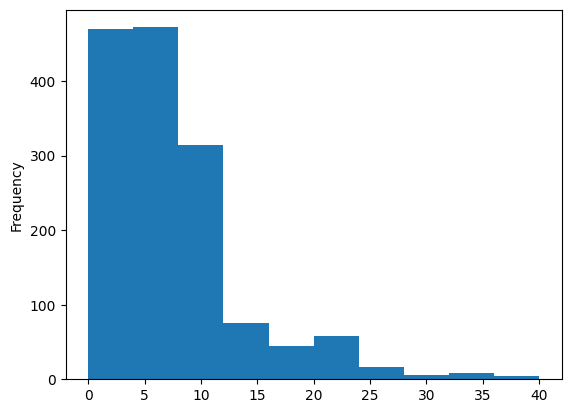

In [ ]:
# Check the distribution of YearsAtCompany
df["YearsAtCompany"].plot.hist();

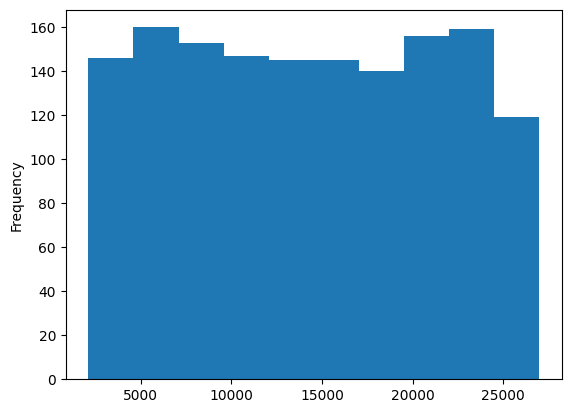

In [ ]:
# Check the distribution of MonthlyRate
df["MonthlyRate"].plot.hist();

## Attrition Frequency per JobSatisfaction Type

* 1 - Low
* 2 - Medium
* 3 - High
* 4 - Very High

In [ ]:
pd.crosstab(df["JobSatisfaction"], df["Attrition"])

Attrition,No,Yes
JobSatisfaction,,
1,223,66
2,234,46
3,369,73
4,407,52


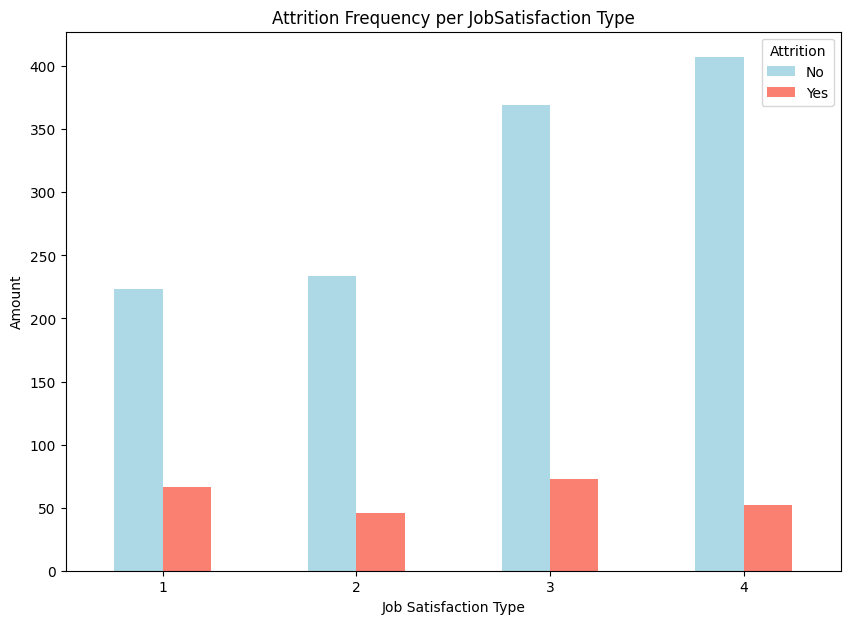

In [ ]:
# Visualizing the cross tab
pd.crosstab(df["JobSatisfaction"], df["Attrition"]).plot(
    kind="bar",
    figsize=(10,7),
    color=["lightblue", "salmon"]
)

# Enhancing the communication
plt.title("Attrition Frequency per JobSatisfaction Type")
plt.xlabel("Job Satisfaction Type")
plt.ylabel("Amount")
plt.xticks(rotation=0);

## Attrition Frequency per WorkLifeBalance Type

* 1 - Bad
* 2 - Good
* 3 - Better
* 4 - Best

In [ ]:
pd.crosstab(df["WorkLifeBalance"], df["Attrition"])

Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


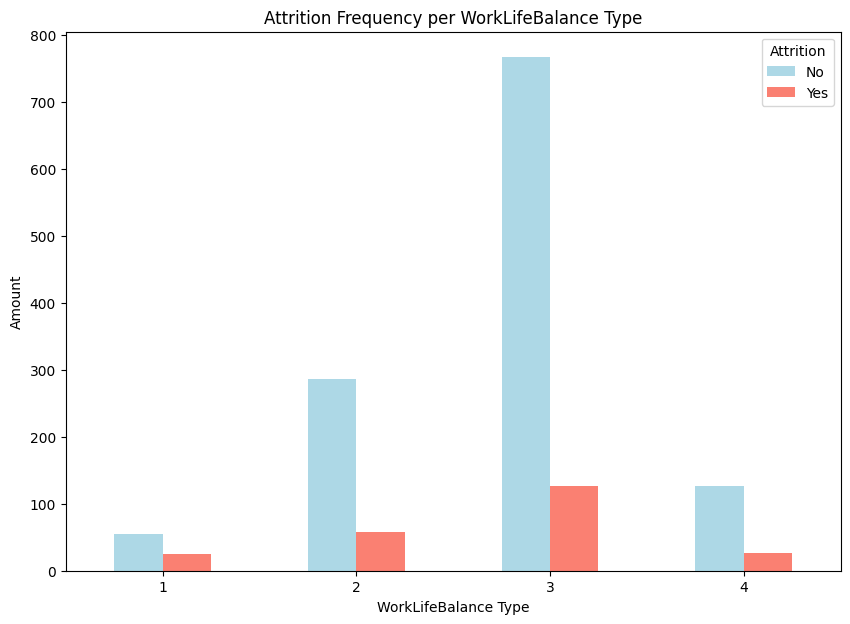

In [ ]:
# Visualizing the cross tab
pd.crosstab(df["WorkLifeBalance"], df["Attrition"]).plot(
    kind="bar",
    figsize=(10,7),
    color=["lightblue", "salmon"]
)

# Enhancing the communication
plt.title("Attrition Frequency per WorkLifeBalance Type")
plt.xlabel("WorkLifeBalance Type")
plt.ylabel("Amount")
plt.xticks(rotation=0);

## Correlation analysis

Correlation Analysis is statistical method that is used to discover if there is a relationship between two variables, and how strong that relationship may be.

In [ ]:
# Binary encoding for the target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Make a Correlation Matrix
df.corr(numeric_only = True)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


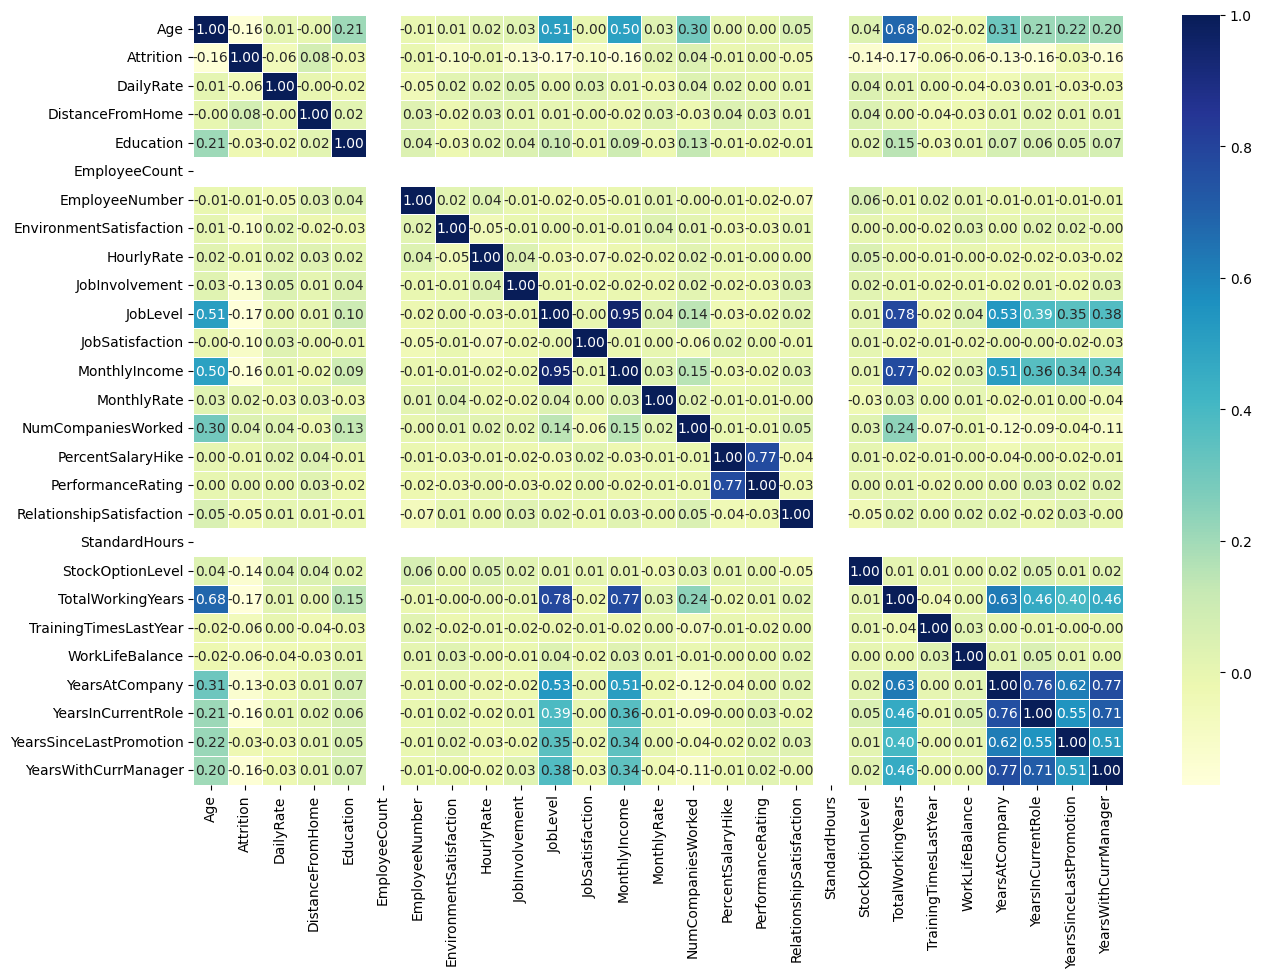

In [ ]:
# Visualizing the Correlation Matrix pretteir
corr_matrix = df.corr(numeric_only = True)
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="YlGnBu"
);

 Since **EmployeeCount**, **StandardHours** are constant columns (columns with the same value for all rows) the correlation between these variables will be undefined, resulting in NaN values.

# Data Preprocessing

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Removing the constant & redundant columns

In [ ]:
# Removing the constant & redundant columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'DailyRate', 'HourlyRate', 'MonthlyRate', 'Over18'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Encoding Categorical Features

In [ ]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [ ]:
# One-Hot Encoding -> BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime
df = pd.get_dummies(df)
df.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1,2,2,3,2,4,5993,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,8,1,3,2,2,2,5130,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,2,2,4,2,1,3,2090,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,3,4,4,3,1,3,2909,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,2,1,1,3,1,2,3468,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


## Creating Features & Labels (Independant Variables and Dependant Variable)

In [ ]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [ ]:
X.shape, y.shape

((1470, 48), (1470,))

## Handling class imbalance using Adaptive Synthetic (ADASYN) algorithm

In [ ]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)

In [ ]:
X_res.shape, y_res.shape

((2422, 48), (2422,))

In [ ]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
y_res.value_counts()

0    1233
1    1189
Name: Attrition, dtype: int64

## Splitting the Dataset into training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1937, 485, 1937, 485)

## Feature Scaling

In [ ]:
X_train

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1606,34,3,2,3,2,1,1,2662,4,11,3,3,0,6,4,3,4,2,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1517,35,14,2,1,1,2,3,5436,6,13,3,4,1,8,2,2,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1848,51,2,3,2,2,5,2,19037,4,13,3,2,0,33,2,3,27,12,7,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1260,32,5,4,2,3,1,2,2718,2,14,3,2,0,12,3,3,7,7,0,7,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
118,36,3,2,1,3,1,4,2835,5,22,4,1,1,7,2,3,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,29,14,3,1,2,1,2,3482,1,11,3,2,0,5,3,2,2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1095,33,28,4,2,3,2,3,5207,1,12,3,2,1,15,3,3,15,14,5,7,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1130,35,28,3,2,4,2,3,3407,1,17,3,4,2,10,3,2,10,9,6,8,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1294,41,5,3,2,4,2,2,6870,3,12,3,1,0,11,3,1,3,2,1,2,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
# Identify numerical columns
numerical_columns = ['Age', 'DistanceFromHome', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale only the numerical columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

In [ ]:
X_train

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1606,0.380952,0.071429,2,3,2,1,1,0.087046,0.444444,0.000000,3,3,0.000000,0.150,0.666667,3,0.100,0.111111,0.000000,0.176471,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1517,0.404762,0.464286,2,1,1,2,3,0.233123,0.666667,0.142857,3,4,0.333333,0.200,0.333333,2,0.025,0.055556,0.066667,0.058824,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1848,0.785714,0.035714,3,2,2,5,2,0.949342,0.444444,0.142857,3,2,0.000000,0.825,0.333333,3,0.675,0.666667,0.466667,0.529412,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1260,0.333333,0.142857,4,2,3,1,2,0.089995,0.222222,0.214286,3,2,0.000000,0.300,0.500000,3,0.175,0.388889,0.000000,0.411765,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
118,0.428571,0.071429,2,1,3,1,4,0.096156,0.555556,0.785714,4,1,0.333333,0.175,0.333333,3,0.025,0.000000,0.000000,0.000000,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.261905,0.464286,3,1,2,1,2,0.130226,0.111111,0.000000,3,2,0.000000,0.125,0.500000,2,0.050,0.055556,0.000000,0.058824,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1095,0.357143,0.964286,4,2,3,2,3,0.221064,0.111111,0.071429,3,2,0.333333,0.375,0.500000,3,0.375,0.777778,0.333333,0.411765,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1130,0.404762,0.964286,3,2,4,2,3,0.126277,0.111111,0.428571,3,4,0.666667,0.250,0.500000,2,0.250,0.500000,0.400000,0.470588,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1294,0.547619,0.142857,3,2,4,2,2,0.308636,0.333333,0.071429,3,1,0.000000,0.275,0.500000,1,0.075,0.111111,0.066667,0.117647,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
X_test

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
613,0.380952,0.071429,2,3,3,1,4,0.143655,0.000000,0.571429,3,3,0.333333,0.100,0.166667,1,0.075,0.111111,0.000000,0.117647,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1266,0.547619,0.285714,4,3,3,1,1,0.067404,0.111111,0.642857,4,2,0.666667,0.125,0.333333,3,0.125,0.166667,0.000000,0.235294,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
892,0.023810,0.321429,3,1,2,1,2,0.044760,0.111111,1.000000,4,2,0.000000,0.025,0.333333,4,0.025,0.055556,0.000000,0.000000,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
296,0.000000,0.071429,3,3,3,1,3,0.021643,0.111111,0.142857,3,3,0.000000,0.000,0.333333,3,0.000,0.000000,0.000000,0.000000,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0
611,0.404762,0.214286,3,3,3,3,3,0.485097,0.333333,0.714286,4,2,0.000000,0.425,0.500000,4,0.200,0.277778,0.066667,0.352941,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,0.714286,0.678571,4,4,3,1,3,0.065824,0.444444,0.428571,3,1,0.666667,0.325,0.333333,2,0.000,0.000000,0.000000,0.000000,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
178,0.666667,0.000000,2,2,3,3,1,0.497314,0.111111,1.000000,4,3,1.000000,0.600,0.333333,3,0.600,0.722222,1.000000,0.411765,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1010,0.880952,0.000000,4,2,4,4,4,0.722643,0.222222,0.142857,3,4,0.666667,0.775,0.666667,4,0.175,0.388889,0.000000,0.000000,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
324,0.285714,0.964286,2,4,3,2,4,0.250974,0.111111,0.142857,3,4,0.666667,0.275,0.333333,3,0.250,0.444444,0.066667,0.529412,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


# Building the Deep Learning Model (ANN - Artificial Neural Network)

In [ ]:
tf.random.set_seed(42)

# 1. Create a Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
61/61 [==============================] - 1s 2ms/step - loss: 0.7134 - accuracy: 0.5250
Epoch 2/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.6546
Epoch 3/10
61/61 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.7697
Epoch 4/10
61/61 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.8281
Epoch 5/10
61/61 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8549
Epoch 6/10
61/61 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8637
Epoch 7/10
61/61 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8766
Epoch 8/10
61/61 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8818
Epoch 9/10
61/61 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8880
Epoch 10/10
61/61 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8947


# Evaluating the model's predictions

In [ ]:
# Evaluate the Model
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.8969


[0.2995127737522125, 0.8969072103500366]

# Hyperparameter Tunning

## Increasing the Training Time period (Epochs count)

In [ ]:
tf.random.set_seed(42)

# 1. Create a Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
model_1.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9052


[0.20189188420772552, 0.9051546454429626]

## Adding extra hidden layer

In [ ]:
tf.random.set_seed(42)

# 1. Create a Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
model_2.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.8907


[0.21124908328056335, 0.8907216787338257]

## Increasing the hidden units (neurons) in hidden layers

In [ ]:
tf.random.set_seed(42)

# 1. Create a Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
model_3.evaluate(X_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.2018 - accuracy: 0.9175


[0.20178906619548798, 0.9175257682800293]

## Increasing epochs count further

In [ ]:
tf.random.set_seed(42)

# 1. Create a Model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_4.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model_4.evaluate(X_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 0.9113


[0.24199344217777252, 0.9113401770591736]

## Adjusting the Activation Function

### softplus

In [ ]:
tf.random.set_seed(42)

# 1. Create a Model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="softplus"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_5.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
model_5.evaluate(X_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.1877 - accuracy: 0.9196


[0.1876654028892517, 0.9195876121520996]

### softmax

In [ ]:
tf.random.set_seed(42)

# 1. Create a Model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="softmax"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_6.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
model_6.evaluate(X_test, y_test)

16/16 [==============================] - 1s 5ms/step - loss: 0.2434 - accuracy: 0.9031


[0.24341018497943878, 0.9030928015708923]

### softsign

In [ ]:
tf.random.set_seed(42)

# 1. Create a Model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="softsign"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_7.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
model_7.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9093


[0.19600839912891388, 0.9092783331871033]

### tanh

In [ ]:
tf.random.set_seed(42)

# 1. Create a Model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_8.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
model_8.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9134


[0.19176556169986725, 0.9134020805358887]

### selu

In [ ]:
tf.random.set_seed(42)

# 1. Create a Model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="selu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_9.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
model_9.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9113


[0.19293363392353058, 0.9113401770591736]

### elu

In [ ]:
tf.random.set_seed(42)

# 1. Create a Model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="elu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_10.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_10.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
model_10.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9155


[0.1955125778913498, 0.915463924407959]

## Adjusting the Learning Rate

In [ ]:
tf.random.set_seed(42)

# 1. Create a Model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="softplus"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_11.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# 3. Fit the model
model_11.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
model_11.evaluate(X_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.2679 - accuracy: 0.9155


[0.2679429054260254, 0.915463924407959]